# MSA Project 1

# 1. Qualitative and Quantitative Data Analysis

### 1A. Identify and differentiate between qualitative and quantitative data in the dataset.

Import the packages

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from statsmodels.stats.weightstats import ztest

Configs

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Load the data

In [3]:
# df_github  = pd.read_csv("/Users/tanweerashif/Studies/MSA_Analytics (PR)/Assignment/GitHub_Bank_marketing.csv", sep=";")
df_kaggle = pd.read_csv("/Users/tanweerashif/Studies/MSA_Analytics (PR)/Assignment/kaggle_bank-direct-marketing-campaigns.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tanweerashif/Studies/MSA_Analytics (PR)/Assignment/kaggle_bank-direct-marketing-campaigns.csv'

In [ ]:
df_kaggle.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

In [ ]:
df_kaggle.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Clean the data

In [ ]:
# Count the null values for each columns
df_kaggle.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# Count the na values for each columns
df_kaggle.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# Check if any duplicate rows are present
print(df_kaggle.duplicated().sum())

# Drop the duplicates
df_kaggle.drop_duplicates(inplace=True)

# Check after dropping
print(df_kaggle.duplicated().sum())

1784
0


In [ ]:
# Check unique values accross the columns
for i in df_kaggle.columns:
    print(i,":")
    print(df_kaggle[i].unique(),"\n")

age :
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital :
['married' 'single' 'divorced' 'unknown'] 

education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default :
['no' 'unknown' 'yes'] 

housing :
['no' 'yes' 'unknown'] 

loan :
['no' 'yes' 'unknown'] 

contact :
['telephone' 'cellular'] 

month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week :
['mon' 'tue' 'wed' 'thu' 'fri'] 

campaign :
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43] 

pdays :
[99

In [ ]:
# Remove the 'unknown' values found above and replace with mode.
mycol = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for i in mycol:
    df_kaggle[i] = df_kaggle[i].replace('unknown', df_kaggle[i].mode()[0])

In [ ]:
# Check for unknown values again.
for i in df_kaggle.columns:
    print(i,":")
    print(df_kaggle[i].unique(),"\n")

age :
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student'] 

marital :
['married' 'single' 'divorced'] 

education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate'] 

default :
['no' 'yes'] 

housing :
['no' 'yes'] 

loan :
['no' 'yes'] 

contact :
['telephone' 'cellular'] 

month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week :
['mon' 'tue' 'wed' 'thu' 'fri'] 

campaign :
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43] 

pdays :
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14

Split feature and target

In [ ]:
len(df_kaggle.columns)

20

In [ ]:
df_kaggle_feature = df_kaggle.iloc[:,:19]
df_kaggle_feature.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
df_kaggle_target = df_kaggle.iloc[:,19:]
df_kaggle_target.head(3)

,y
0,no
1,no
2,no


Qualitative and quantitative data in the dataset -

In [ ]:
df_kaggle.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

In [ ]:
# Check the non-numerical data
df_kaggle.select_dtypes(include=['object']).columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

Hence, the qualitative columns are -
1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
8. month
9. day_of_week
10. poutcome
11. y

Whereas the quantitative columns are -
1. age
2. campaign
3. pdays
4. previous
5. emp.var.rate
6. cons.price.idx
7. cons.conf.idx
8. euribor3m
9. nr.employed

### 1B. Provide examples of marketing data attributes and perform exploratory data analysis (EDA).

In [ ]:
print(f"Examples of the marketing data attributes:\n{df_kaggle.head()}")

Examples of the marketing data attributes:
   age        job  marital    education default housing loan    contact month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y
0   56  housemaid  married     basic.4y      no      no   no  telephone   may         mon         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
1   57   services  married  high.school      no      no   no  telephone   may         mon         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
2   37   services  married  high.school      no     yes   no  telephone   may         mon         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0  no
3   40     admin.  married     basic.6y      no      no   no  telephone   may         mon         1    999         0  nonexistent           1.1  

In [ ]:
df_kaggle.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000
mean,40.116105,2.618744,960.847097,0.178738,0.064067,93.577538,-40.499604,3.601243,5165.986481
std,10.460328,2.814780,190.869184,0.503172,1.577041,0.583820,4.644327,1.742337,72.763866
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null  floa

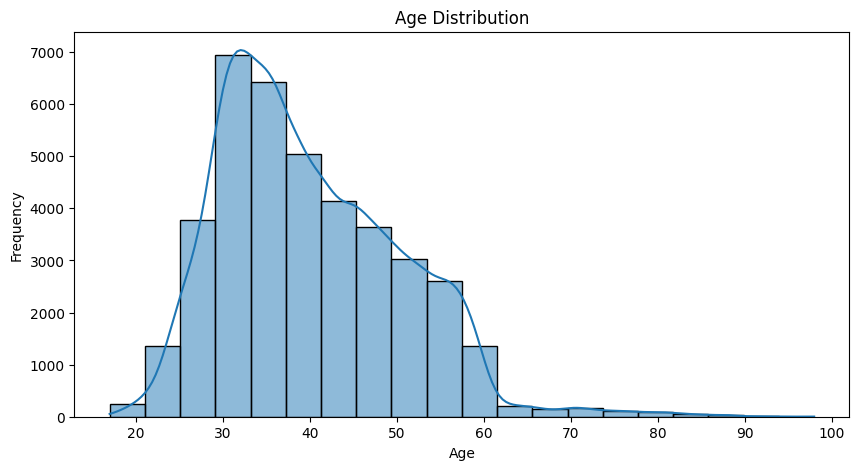

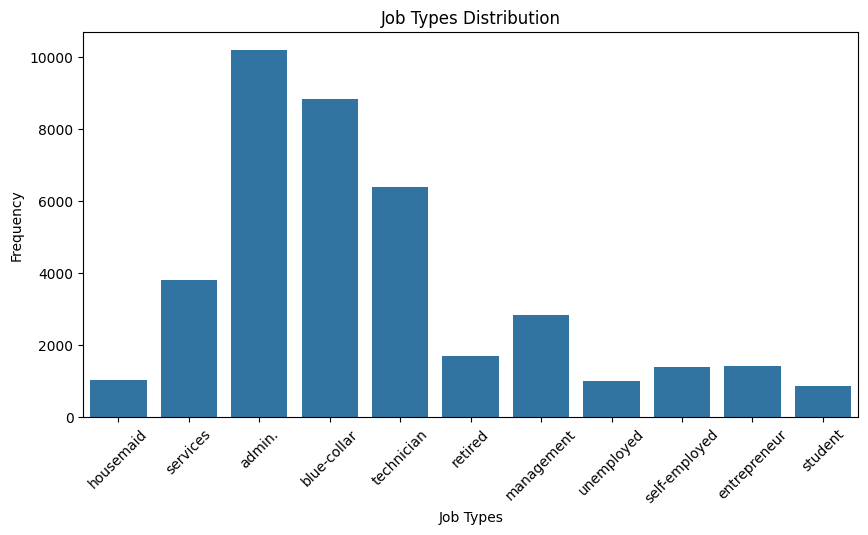

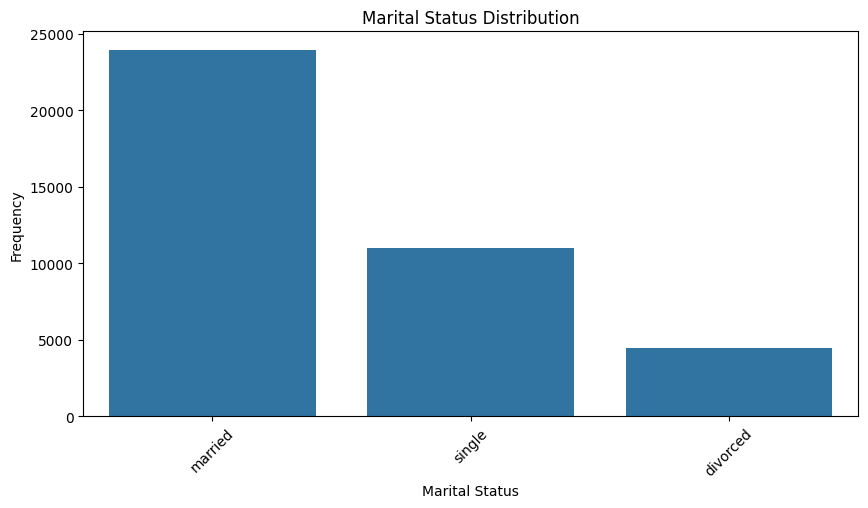

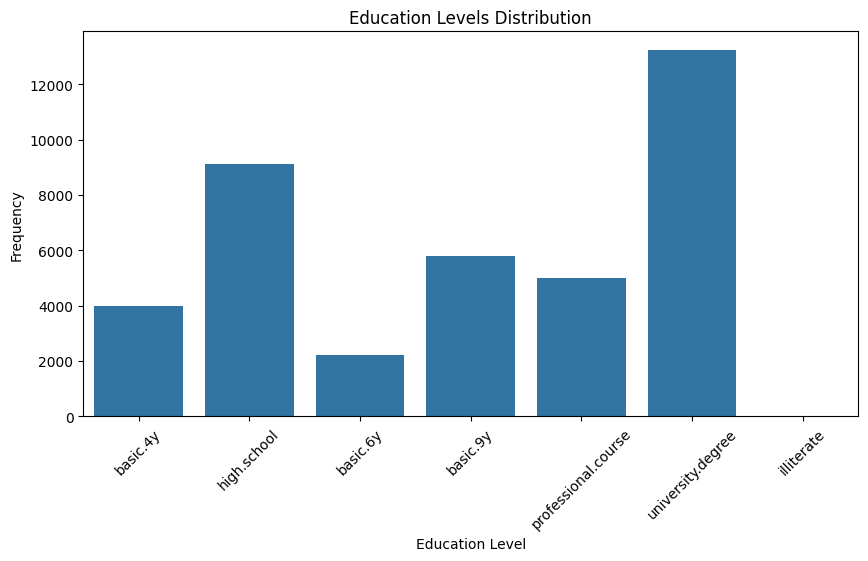

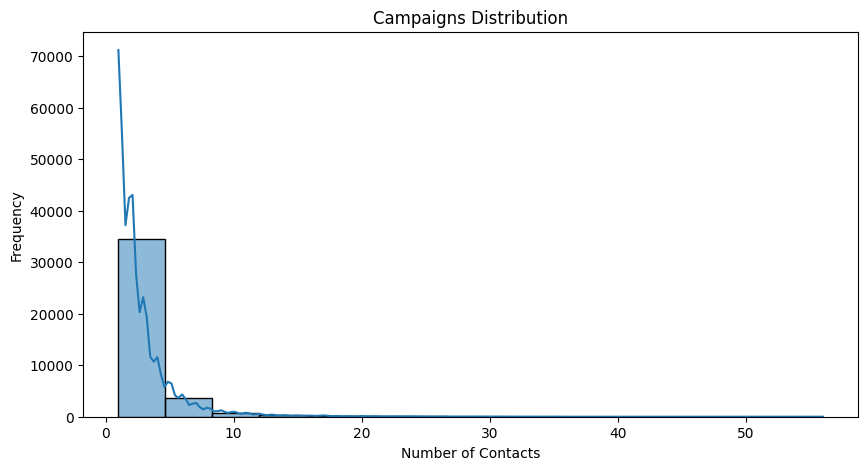

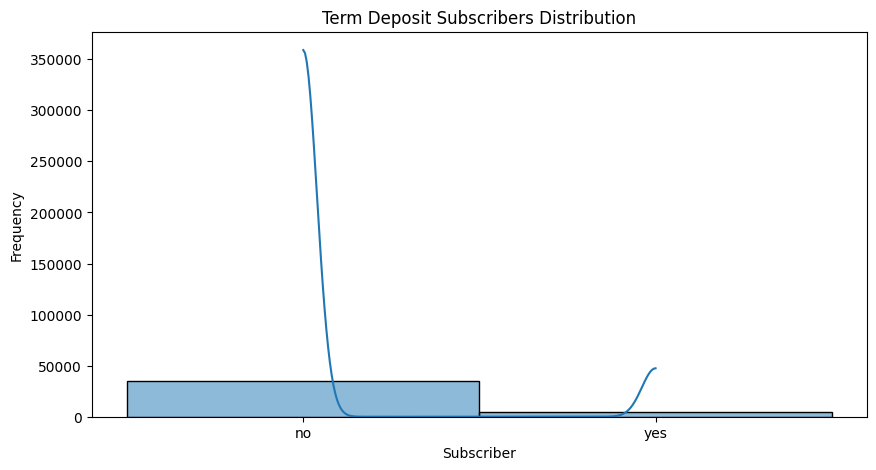

In [ ]:
# Visualize the dataset for analysis

# Age
plt.figure(figsize=(10, 5))
sns.histplot(df_kaggle['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Job
plt.figure(figsize=(10, 5))
sns.countplot(data=df_kaggle, x='job')
plt.title('Job Types Distribution')
plt.xlabel('Job Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Marital
plt.figure(figsize=(10, 5))
sns.countplot(data=df_kaggle, x='marital')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Education
plt.figure(figsize=(10, 5))
sns.countplot(data=df_kaggle, x='education')
plt.title('Education Levels Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Campaign
plt.figure(figsize=(10, 5))
sns.histplot(df_kaggle['campaign'], bins=15, kde=True)
plt.title('Campaigns Distribution')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.show()

# Subscription
plt.figure(figsize=(10, 5))
sns.histplot(df_kaggle['y'], bins=15, kde=True)
plt.title('Term Deposit Subscribers Distribution')
plt.xlabel('Subscriber')
plt.ylabel('Frequency')
plt.show()

Insights:
1. Most of the people belong to approx age range 30 to 37.
2. Top 3 job types are admin, bluecollar and technician.
3. Most of the people are married.
4. Most of the people have university degree.
5. Most were contacted around 5 times.
6. Most of the people did not subscribe (around 35,000).

Bivariate Analysis

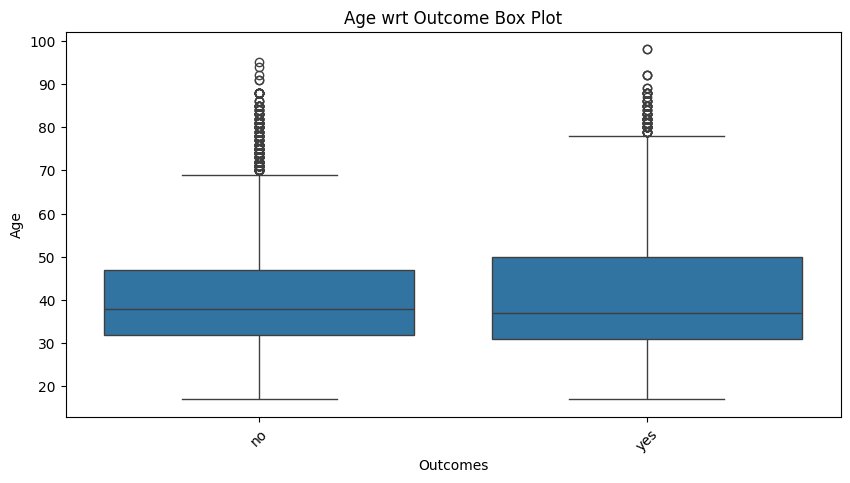

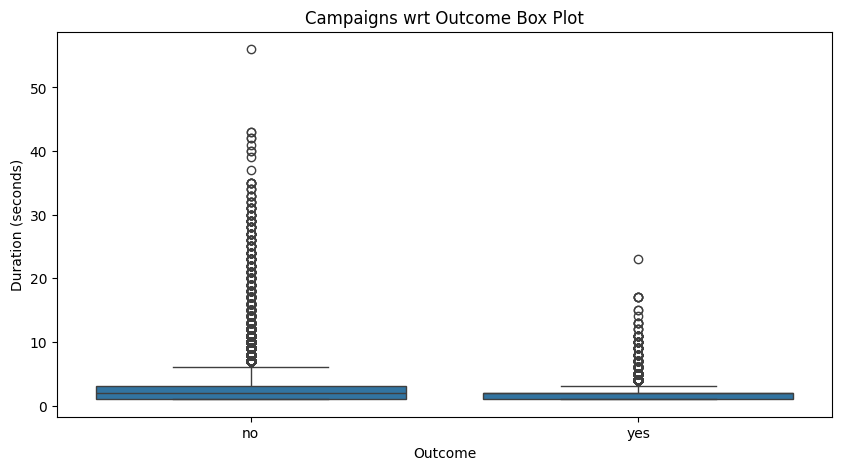

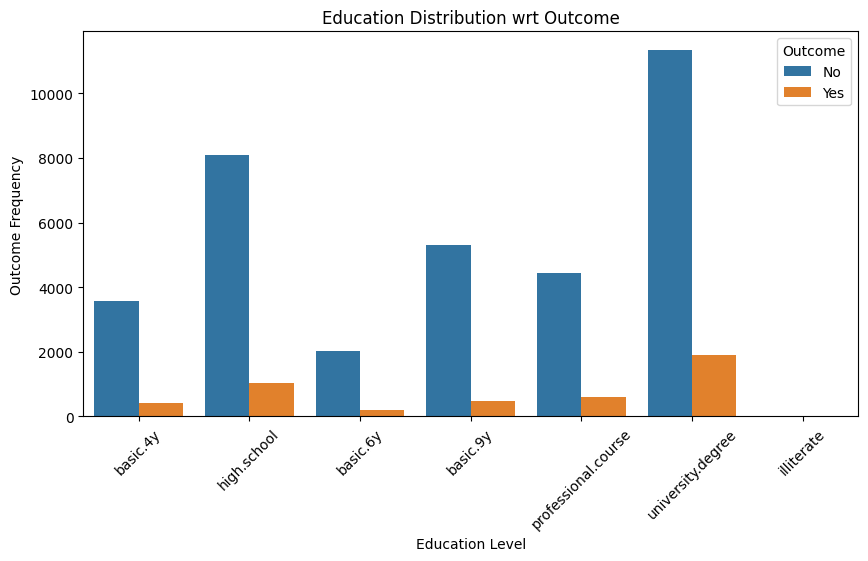

In [ ]:
# Age vs Outcome Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_kaggle, x='y', y='age')
plt.title('Age wrt Outcome Box Plot')
plt.xlabel('Outcomes')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Campaigns vs Outcome Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_kaggle, x='y', y='campaign')
plt.title('Campaigns wrt Outcome Box Plot')
plt.xlabel('Outcome')
plt.ylabel('Duration (seconds)')
plt.show()

# Education vs Outcome Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df_kaggle, x='education', hue='y')
plt.title('Education Distribution wrt Outcome')
plt.xlabel('Education Level')
plt.ylabel('Outcome Frequency')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['No', 'Yes'])
plt.show()

Insights:
1. There are some extreme values of age seen who subscribed and who didn't. Subscribers side extreme counts are more than the non-subscribers.
2. Most of the subscribers have university degree.

Multivariate Analysis

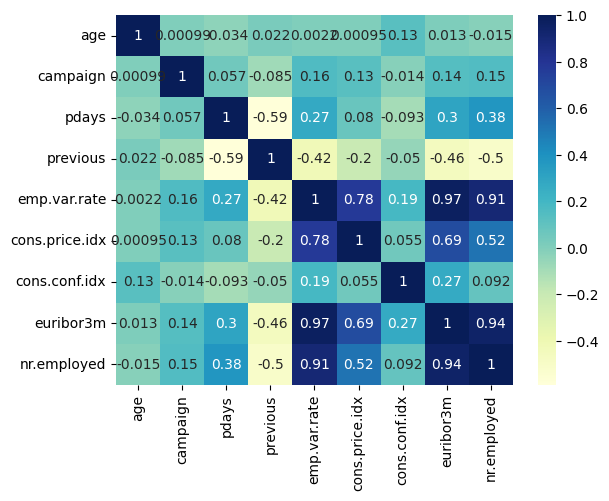

In [ ]:
num_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

dataplot = sns.heatmap(df_kaggle[num_cols].corr(), cmap="YlGnBu", annot=True) 

Insights:
1. There is a strong correlation found between euribor3m and emp.var.rate (0.97).
2. Also, there is a strong correlation found between euribor3m and number of employees (0.94).

Outliers

In [ ]:
df_kaggle.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


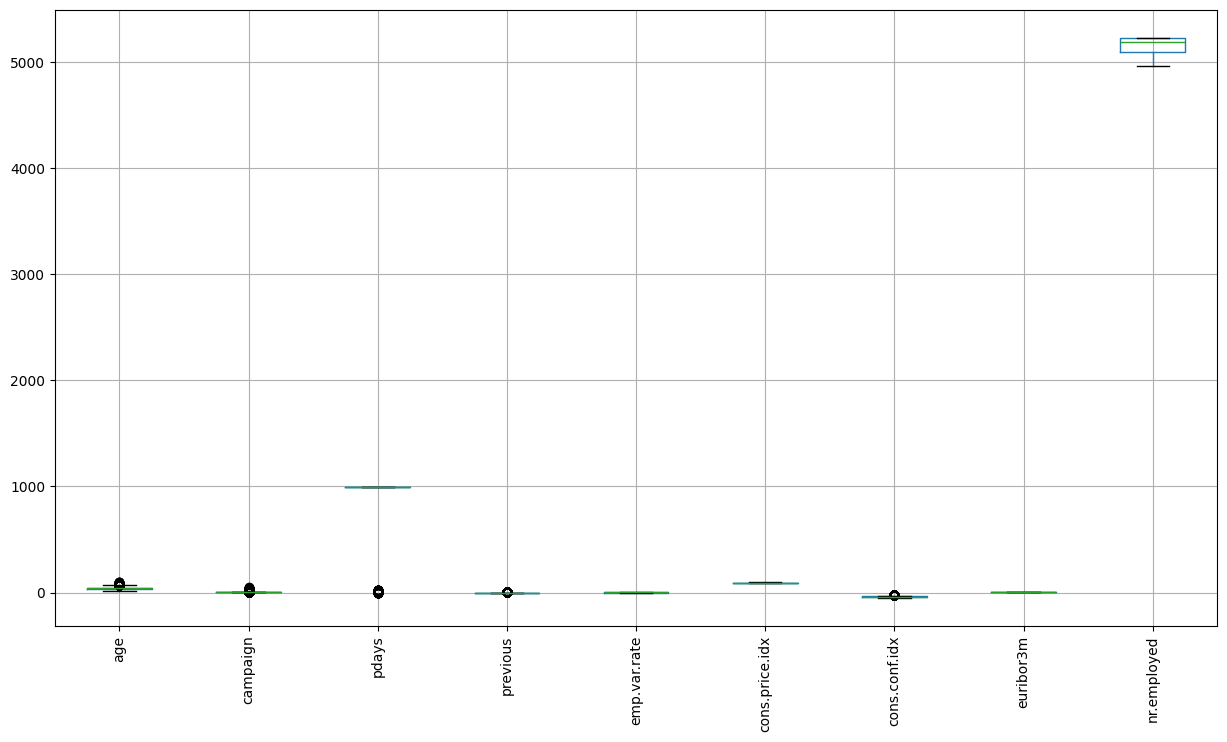

In [ ]:
# Visualize outliers in each numerical column
df_kaggle[num_cols].boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [ ]:
# Count above outliers
dfknum = df_kaggle[num_cols]
Q1 =dfknum.quantile(0.25)
Q3 = dfknum.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
col_count = ((dfknum > UL) | (dfknum < LL)).sum()
print(f"Outliers count columnwise:\n{col_count}")

# Remove above outliers
def outlremover(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    left_fence = q1 - 1.5 * iqr
    right_fence = q3 + 1.5 * iqr
    return left_fence, right_fence
col = dfknum.columns
for j in col:
    left_fence, right_fence = outlremover(dfknum[j])
    dfknum[j] = np.where(dfknum[j] > right_fence,
                                      right_fence, dfknum[j])
    dfknum[j] = np.where(dfknum[j] < left_fence,
                                      left_fence, dfknum[j])

# Port the removal to original dataframe
df_kaggle[num_cols] = dfknum

# Count above outliers again to verify
Q1 =df_kaggle[num_cols].quantile(0.25)
Q3 = df_kaggle[num_cols].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
col_count = ((df_kaggle[num_cols] > UL) | (df_kaggle[num_cols] < LL)).sum()
print(f"\nOutliers count columnwise:\n{col_count}")

Outliers count columnwise:
age                458
campaign          2398
pdays             1514
previous          5546
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      436
euribor3m            0
nr.employed          0
dtype: int64

Outliers count columnwise:
age               0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


/var/folders/p0/sy3m41v11lg_l368z31s76jw0000gn/T/ipykernel_14180/3396837445.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfknum[j] = np.where(dfknum[j] > right_fence,
/var/folders/p0/sy3m41v11lg_l368z31s76jw0000gn/T/ipykernel_14180/3396837445.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfknum[j] = np.where(dfknum[j] < left_fence,
/var/folders/p0/sy3m41v11lg_l368z31s76jw0000gn/T/ipykernel_14180/3396837445.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
df_kaggle.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

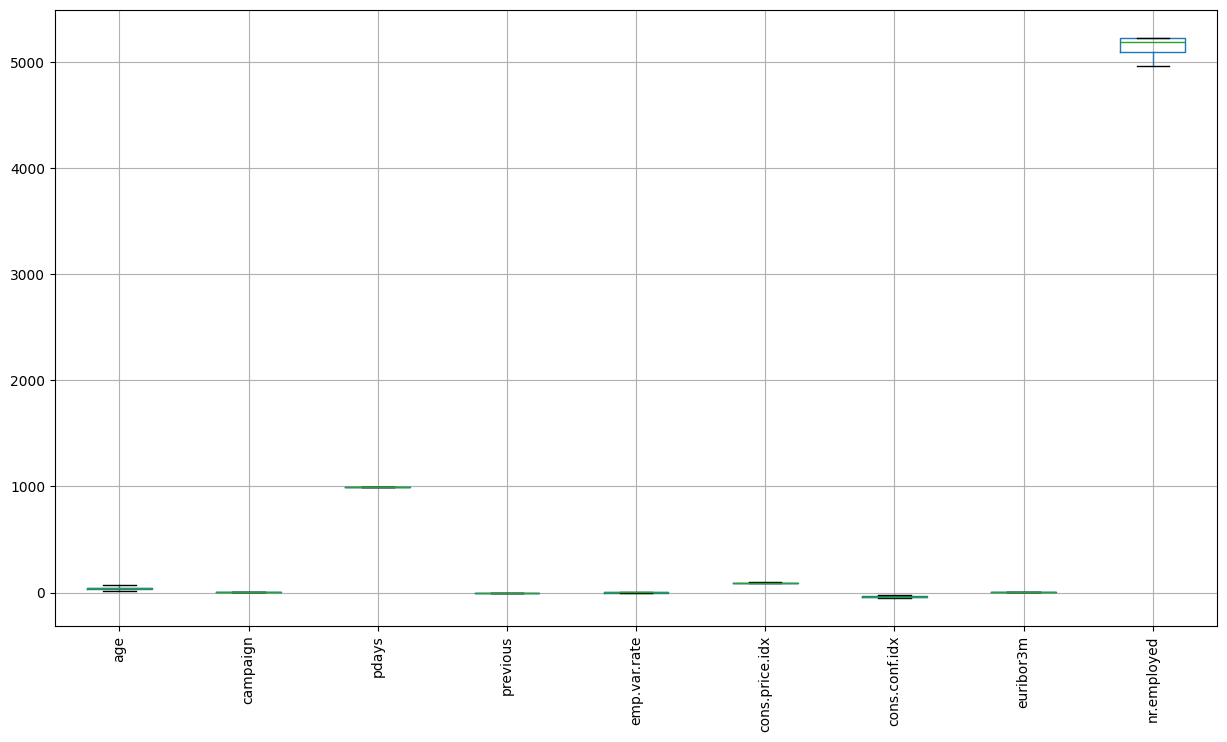

In [ ]:
# Visualize outliers again in each numerical column
df_kaggle.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [ ]:
df_kaggle.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39404.000000,39404.000000,39404.0,39404.0,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000
mean,40.030124,2.313623,999.0,0.0,0.064067,93.577538,-40.500157,3.601243,5165.986481
std,10.165684,1.564525,0.0,0.0,1.577041,0.583820,4.642709,1.742337,72.763866
min,17.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.0,0.0,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.0,0.0,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.500000,6.000000,999.0,0.0,1.400000,94.767000,-26.950000,5.045000,5228.100000


In [ ]:
df_kaggle.shape

(39404, 20)

# 2. Statistics and Hypothesis Testing

### 2A. Apply statistical methods to analyze the marketing data

In [ ]:
df_kaggle.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print(f"List of quantitative columns:\n{df_kaggle.select_dtypes(include=['object']).columns.tolist()}")

List of quantitative columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [ ]:
print(f"List of qualitative columns:\n{df_kaggle.select_dtypes(include=['object']).columns}")

List of qualitative columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], dtype='object')


In [ ]:
print("\nFrequency distribution for qualitative data:")
for col in df_kaggle.columns:
    print(f"\n{col} value counts:")
    print(df_kaggle[col].value_counts())


Frequency distribution for qualitative data:

age value counts:
age
31.0    1825
32.0    1764
33.0    1741
35.0    1671
36.0    1670
34.0    1646
30.0    1614
37.0    1431
29.0    1369
39.0    1368
38.0    1351
41.0    1212
40.0    1113
42.0    1104
45.0    1058
43.0    1014
46.0     993
44.0     974
28.0     944
48.0     939
47.0     899
50.0     844
49.0     807
27.0     797
52.0     753
51.0     728
53.0     712
56.0     687
26.0     675
54.0     661
55.0     629
57.0     626
25.0     579
58.0     558
69.5     458
59.0     452
24.0     440
60.0     278
23.0     213
22.0     134
21.0      99
61.0      73
20.0      64
62.0      62
66.0      57
64.0      56
63.0      54
65.0      43
19.0      41
68.0      33
69.0      32
18.0      28
67.0      26
17.0       5
Name: count, dtype: int64

job value counts:
job
admin.           10198
blue-collar       8835
technician        6404
services          3801
management        2820
retired           1683
entrepreneur      1405
self-employed     1

In [ ]:
print("\nDescriptive stats for quantitative data:")
print(df_kaggle.describe())


Descriptive stats for quantitative data:
                age      campaign    pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  39404.000000  39404.000000  39404.0   39404.0  39404.000000    39404.000000   39404.000000  39404.000000  39404.000000
mean      40.030124      2.313623    999.0       0.0      0.064067       93.577538     -40.500157      3.601243   5165.986481
std       10.165684      1.564525      0.0       0.0      1.577041        0.583820       4.642709      1.742337     72.763866
min       17.000000      1.000000    999.0       0.0     -3.400000       92.201000     -50.800000      0.634000   4963.600000
25%       32.000000      1.000000    999.0       0.0     -1.800000       93.075000     -42.700000      1.334000   5099.100000
50%       38.000000      2.000000    999.0       0.0      1.100000       93.798000     -41.800000      4.857000   5191.000000
75%       47.000000      3.000000    999.0       0.0      1.400000       93.

### 2B. Conduct hypothesis testing to interpret marketing strategies and validate assumptions

**Chi-Square Test**

Assumption:</br>
H0: Education doesn't impact whether a person will go for term deposit.</br>
H1: Education impacts whether a person will opt for term desposit.

In [ ]:
df_kaggle_table=pd.crosstab(df_kaggle['education'], df_kaggle['y'])
print(f"df_kaggle_table:\n{df_kaggle_table}")
print(f"\ndf_kaggle_table values:\n{df_kaggle_table.values}")

# Take actual Values
actual_values = df_kaggle_table.values 
print(f"\nactual_values:\n{actual_values}")

# Make contingency table
chi_stats, chi_pval, chi_dof,  chi_expected_values=sp.stats.chi2_contingency(df_kaggle_table)
print(f"\nexpected_values:\n{chi_expected_values}")

chi_alpha = 0.05

if chi_pval<=chi_alpha:
    print("\nReject H0. Conclusion is that education and y(accepting term deposit) are related!")
else:
    print("\nAccept H0. Conclusion is that education and y(accepting term deposit) not related!")

df_kaggle_table:
y                       no   yes
education                       
basic.4y              3568   425
basic.6y              2034   188
basic.9y              5319   466
high.school           8098  1023
illiterate              14     4
professional.course   4426   592
university.degree    11347  1900

df_kaggle_table values:
[[ 3568   425]
 [ 2034   188]
 [ 5319   466]
 [ 8098  1023]
 [   14     4]
 [ 4426   592]
 [11347  1900]]

actual_values:
[[ 3568   425]
 [ 2034   188]
 [ 5319   466]
 [ 8098  1023]
 [   14     4]
 [ 4426   592]
 [11347  1900]]

expected_values:
[[3.52706218e+03 4.65937824e+02]
 [1.96271780e+03 2.59282205e+02]
 [5.10995610e+03 6.75043904e+02]
 [8.05668272e+03 1.06431728e+03]
 [1.58996041e+01 2.10039590e+00]
 [4.43245630e+03 5.85543701e+02]
 [1.17012253e+04 1.54577469e+03]]

Reject H0. Conclusion is that education and y(accepting term deposit) are related!


**T-Test**

Assumption:</br>
H0: There is no significant difference between the age of subscribers and non-subscribers.</br>
H1: There is a significant difference between the age of subscribers and non-subscribers

In [ ]:
df_kaggle.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Create two groups. One for age of subscribers and another sample of age for non-subscibers.
subscriber_age = df_kaggle[df_kaggle['y'] == 'yes']['age']
non_subscriber_age = df_kaggle[df_kaggle['y'] == 'no']['age']

# Perform T-test
t_stats, t_pval = sp.stats.ttest_ind(subscriber_age, non_subscriber_age)
print(f"T-test for age:\nt-statistic = {t_stats},\np-value = {t_pval}")

t_alpha = 0.05

if t_pval <= t_alpha:
    print("\nReject H0: There is a significant difference between the age of subscribers and non-subscribers!")
else:
    print("\nAccept H0: There is no significant difference between the age of subscribers and non-subscribers!")

T-test for age:
t-statistic = 3.7375460909153824,
p-value = 0.00018608743711668053

Reject H0: There is a significant difference between the age of subscribers and non-subscribers!


**Z-Test**

Assumption:</br>
H0: There is no significant difference between the number of contacts performed for this campaign for the subscribers and non-subscribers.</br>
H1: There is a significant difference between the number of contacts performed for this campaign for the subscribers and non-subscribers.

In [ ]:
subscribed_age = df_kaggle[df_kaggle['y'] == 'yes']['campaign']
not_subscribed_age = df_kaggle[df_kaggle['y'] == 'no']['campaign']

z_stats, z_pval = ztest(subscribed_age, not_subscribed_age)
print(f"Z-test for age:\nz-statistic = {z_stats}\np-value = {z_pval}")

z_alpha = 0.05

if z_pval <= z_alpha:
    print("\nReject H0: A significant difference between the number of contacts performed for this campains for subscribers and non-subscribers.")
else:
    print("\nAccept H0: No significant difference between the number of contacts performed for this campains for subscribers and non-subscribers.")

Z-test for age:
z-statistic = -15.472235996518643
p-value = 5.341884962930454e-54

Reject H0: A significant difference between the number of contacts performed for this campains for subscribers and non-subscribers.


# 3. Factor Analysis, Regression, and Decision Trees

### 3A. Perform factor analysis to identify underlying variables that influence marketing outcomes.

Standardization

In [ ]:
# Scale the relevant (numerical) columns.
num_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
dfknum = df_kaggle[num_cols]
dfk_scaler = StandardScaler()
dfknum_scaled = dfk_scaler.fit_transform(dfknum)
dfknum_scaled = pd.DataFrame(dfknum_scaled, columns=num_cols)
dfk_scaled = pd.concat([dfknum_scaled, df_kaggle.drop(num_cols, axis=1)], axis=1)
dfk_scaled = dfk_scaled.dropna()

In [ ]:
dfk_scaled

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,1.570979,-0.839641,0.0,0.0,0.656892,0.713348,0.883150,0.720741,0.343767,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,1.669351,-0.839641,0.0,0.0,0.656892,0.713348,0.883150,0.720741,0.343767,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,-0.298078,-0.839641,0.0,0.0,0.656892,0.713348,0.883150,0.720741,0.343767,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,-0.002963,-0.839641,0.0,0.0,0.656892,0.713348,0.883150,0.720741,0.343767,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,1.570979,-0.839641,0.0,0.0,0.656892,0.713348,0.883150,0.720741,0.343767,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39399,2.898993,-0.839641,0.0,0.0,-0.738143,2.037402,-2.218526,-1.476911,-2.781450,student,single,university.degree,no,yes,no,cellular,apr,thu,failure,no
39400,0.587265,-0.839641,0.0,0.0,-0.738143,2.037402,-2.218526,-1.476911,-2.781450,admin.,divorced,high.school,no,yes,no,telephone,apr,thu,failure,yes
39401,1.570979,-0.200461,0.0,0.0,-0.738143,2.037402,-2.218526,-1.476911,-2.781450,student,single,university.degree,no,no,no,cellular,apr,thu,nonexistent,no
39402,0.390522,-0.839641,0.0,0.0,-0.738143,2.037402,-2.218526,-1.476911,-2.781450,retired,divorced,basic.4y,no,no,no,cellular,apr,thu,failure,no


In [ ]:
dfk_scaled.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37626.000000,37626.000000,37626.0,37626.0,37626.000000,37626.000000,37626.000000,37626.000000,37626.000000
mean,0.000337,-0.001281,0.0,0.0,-0.008748,0.004935,0.000822,-0.008948,-0.011907
std,1.001385,0.998573,0.0,0.0,1.003057,1.007826,1.002861,1.003413,1.005824
min,-2.265506,-0.839641,0.0,0.0,-2.196589,-2.357841,-2.218526,-1.703047,-2.781450
25%,-0.789935,-0.839641,0.0,0.0,-1.182018,-0.860787,-0.473833,-1.301282,-0.919238
50%,-0.199706,-0.200461,0.0,0.0,0.656892,0.511228,-0.279979,0.720741,0.343767
75%,0.685637,0.438718,0.0,0.0,0.847124,0.713348,0.883150,0.780431,0.853642
max,2.898993,2.356257,0.0,0.0,0.847124,2.037402,2.918625,0.828643,0.853642


Categorical to Numerical Conversion(Encoding)

In [ ]:
# Encode y (ordinal encoding)
dfk_scaled['y'] = dfk_scaled['y'].replace('no','0')
dfk_scaled['y'] = dfk_scaled['y'].replace('yes','1')
dfk_scaled['y'] = dfk_scaled['y'].astype(int)

# Encode education (ordinal encoding)
dfk_scaled['education'] = dfk_scaled['education'].replace('university.degree','7')
dfk_scaled['education'] = dfk_scaled['education'].replace('professional.course','6')
dfk_scaled['education'] = dfk_scaled['education'].replace('high.school','5')
dfk_scaled['education'] = dfk_scaled['education'].replace('basic.9y','4')
dfk_scaled['education'] = dfk_scaled['education'].replace('basic.6y','3')
dfk_scaled['education'] = dfk_scaled['education'].replace('basic.4y','2')
dfk_scaled['education'] = dfk_scaled['education'].replace('illiterate','1')
dfk_scaled['education'] = dfk_scaled['education'].astype(int)

# Encode remaining categorical variables to prepare for the model building.
en_cols = ['marital', 'loan', 'contact', 'housing', 'default', 'month', 'day_of_week', 'job', 'poutcome']
dfkenc = pd.get_dummies(dfk_scaled, columns=en_cols, drop_first=True)
conv = [col for col in dfkenc.columns if dfkenc[col].dtype == 'bool']
dfkenc[conv] = dfkenc[conv].astype(int)
dfkenc.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education,y,marital_married,marital_single,loan_yes,contact_telephone,housing_yes,default_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_nonexistent,poutcome_success
0,1.570979,-0.839641,0.0,0.0,0.656892,0.713348,0.88315,0.720741,0.343767,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1.669351,-0.839641,0.0,0.0,0.656892,0.713348,0.88315,0.720741,0.343767,5,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.298078,-0.839641,0.0,0.0,0.656892,0.713348,0.88315,0.720741,0.343767,5,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.002963,-0.839641,0.0,0.0,0.656892,0.713348,0.88315,0.720741,0.343767,3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.570979,-0.839641,0.0,0.0,0.656892,0.713348,0.88315,0.720741,0.343767,5,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Factor Analysis

In [ ]:
# Split the target and feature variable
X = dfkenc.drop('y', axis=1)
y = dfkenc['y']

# Factor Analysis
num_factors = 5
fact_anl = FactorAnalysis(n_components=num_factors, random_state=0)
factors = fact_anl.fit_transform(X)

# Print the result
myloads = pd.DataFrame(fact_anl.components_.T, index=X.columns, columns=[f'Factor_{i+1}' for i in range(num_factors)])
print(f"Factors:\n{myloads}")

Factors:
                          Factor_1      Factor_2      Factor_3      Factor_4      Factor_5
age                  -5.721688e-03  1.104978e-02  1.116593e-01  3.570871e-03  7.390718e-03
campaign             -1.550664e-01  8.383162e-03 -7.107941e-02  7.914620e-03  2.929643e-02
pdays                 2.236048e-30  2.629178e-27 -1.616496e-23 -5.216708e-23  6.460855e-23
previous             -3.667413e-33  1.393745e-28 -4.466694e-25  7.340453e-25  1.499850e-23
emp.var.rate         -9.682796e-01  1.785595e-01  8.725381e-02  1.170552e-02  8.396696e-02
cons.price.idx       -6.807159e-01  7.376231e-01 -5.769303e-02  7.437191e-04  5.634056e-03
cons.conf.idx        -1.310800e-01  1.361784e-02  8.138148e-01  1.821304e-02 -1.519025e-01
euribor3m            -9.862260e-01  4.494837e-02  1.650779e-01  5.577730e-03  1.036854e-02
nr.employed          -9.836511e-01 -1.996621e-01 -5.053746e-02 -1.286169e-03 -7.343898e-03
education             1.060682e-01 -9.374560e-02  1.442362e-01  3.231758e-01  1.5

Visualization of Factors

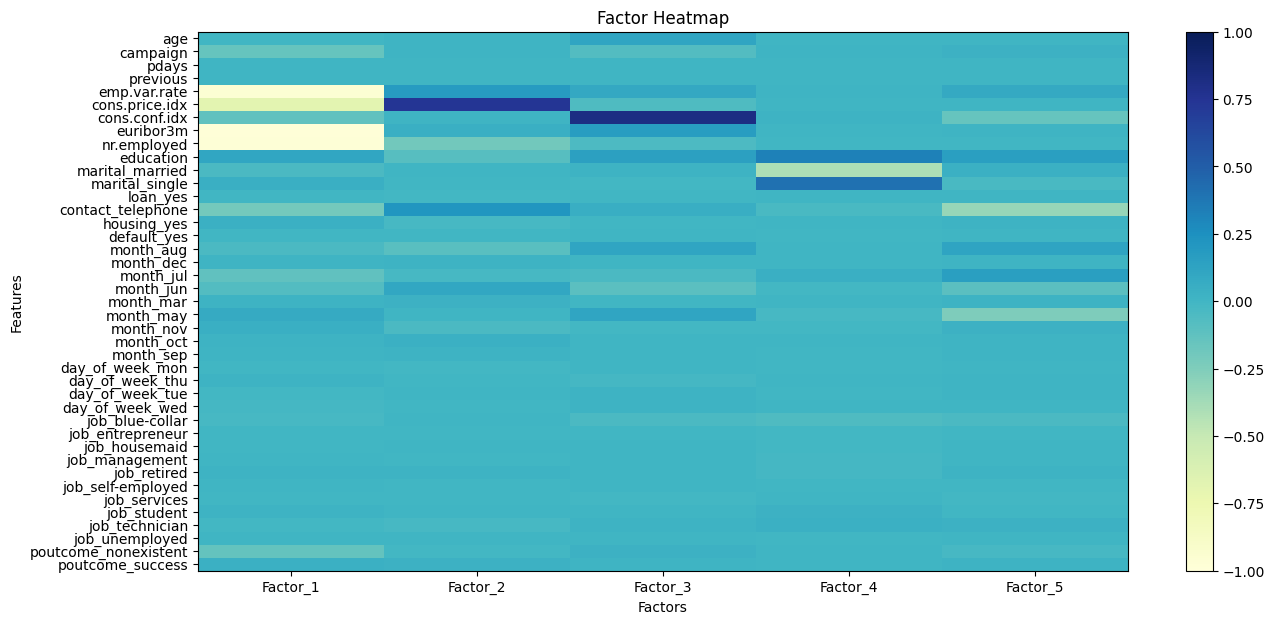

In [ ]:
plt.figure(figsize=(15, 7))
plt.imshow(myloads, cmap='YlGnBu', aspect='auto', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Factor Heatmap')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.xticks(np.arange(num_factors), myloads.columns)
plt.yticks(np.arange(len(myloads.index)), myloads.index)
plt.show()

### 3B. Build regression models to predict marketing performance.

Split the training and testing dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
f_names=X_train.columns

In [ ]:
# Train the logistic regression model
lr_model= LogisticRegression(random_state=1)
lr_model.fit(X_train, y_train)

# Print lr coeff
lr_coef=lr_model.coef_
print(f"lr_coeff:\n{lr_coef}")

# Make a predictor
def log_reg_predictor(data):
    return lr_model.predict(data)

lr_coeff:
[[-0.01559777 -0.05073277  0.          0.          0.03983363  0.07651326
   0.22021077 -0.4252902  -0.2548922   0.02464311  0.06871903  0.12428892
  -0.07450156 -0.39800881 -0.0622377   0.         -0.64650801 -0.13971359
  -0.35445853 -0.45667234  0.99561528 -1.07297595 -0.73759046  0.19108637
  -0.10170702 -0.07533309  0.16245431  0.19023796  0.28412569 -0.12589843
  -0.08429865 -0.09256285 -0.11037701  0.22104878 -0.01356152 -0.17448423
   0.24454483 -0.09285195 -0.02263316  0.38303502  1.51480337]]


### 3C. Develop decision tree models to segment the market and predict customer behavior

In [ ]:
dtree_model = DecisionTreeClassifier(random_state=1)
dtree_model.fit(X_train,y_train)
dtree_train_label = ['No', 'Yes']
ldtree_tf = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dtree_model, out_file=ldtree_tf, 
                                feature_names = list(X_train), 
                                class_names = list(dtree_train_label))
ldtree_tf.close()

# Make a predictor
def dtree_predictor(data):
    return dtree_model.predict(data)

# 4. Predictive Modeling

### 4A. Create predictive models using MS Excel, Python, or a no-code tool. </br>(Output variable (desired target): 20 - y - has the client subscribed a term deposit? (binary: 'yes','no') )

In [ ]:
# All in once predictor
def ultimate_predictor(sample):
    # Logistic Regression
    res_lr = log_reg_predictor(sample)
    print(f"Prediction by logistic regression model:")
    if res_lr == 0:
        print("No, client didn't subscribe for the term deposit!")
    else:
        print("Yes, the client subscribed for the term deposit!")
    # Decision Tree
    res_dt = dtree_predictor(sample)
    print(f"Prediction by decision tree model:")
    if res_dt == 0:
        print("No, client didn't subscribe for the term deposit!")
    else:
        print("Yes, the client subscribed for the term deposit!")

# Test a sample for example
print("For sample:")
ultimate_predictor(X_test.sample(1))

For sample:
Prediction by logistic regression model:
Yes, the client subscribed for the term deposit!
Prediction by decision tree model:
Yes, the client subscribed for the term deposit!


### 4B. Evaluate the performance of the predictive models and provide insights.

**1. For Logistic Regression Model**

In [ ]:
# Evaluate the model chatacteristic
print("Logistic Regression Model:")
y_lrtest_pred = lr_model.predict(X_test)
print("\nClassification Report for test data:")
print(classification_report(y_test, y_lrtest_pred))
y_lrtrain_pred = lr_model.predict(X_train)
print("\nClassification report for training data:")
print(classification_report(y_train, y_lrtrain_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_lrtest_pred))

Logistic Regression Model:

Classification Report for test data:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10156
           1       0.67      0.13      0.22      1132

    accuracy                           0.91     11288
   macro avg       0.79      0.56      0.59     11288
weighted avg       0.89      0.91      0.88     11288


Classification report for training data:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23786
           1       0.61      0.12      0.20      2552

    accuracy                           0.91     26338
   macro avg       0.76      0.55      0.57     26338
weighted avg       0.88      0.91      0.88     26338


Accuracy Score:
0.9066265060240963


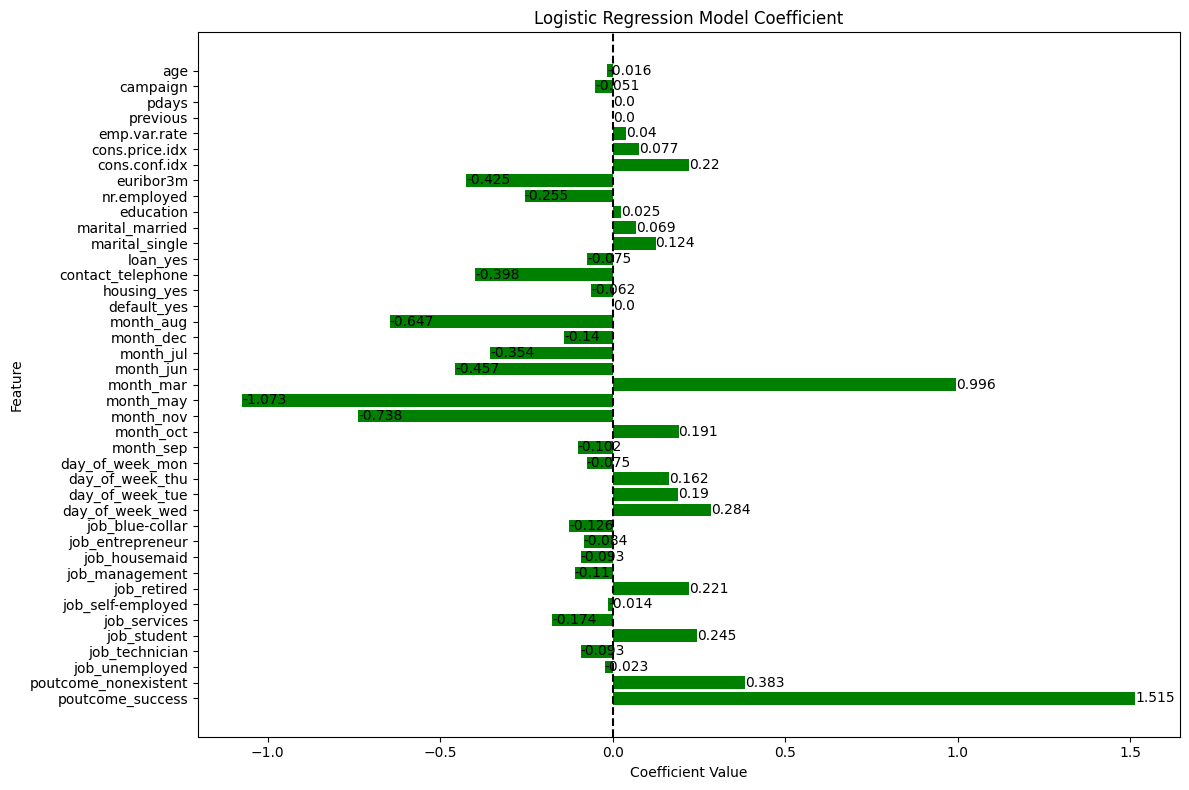

In [ ]:
# Visualize Model Coeffficient
plt.figure(figsize=(12, 8))
bars = plt.barh(f_names, lr_coef[0], color='green')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Logistic Regression Model Coefficient')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             round(bar.get_width(), 3), va='center')
plt.tight_layout()
plt.show()

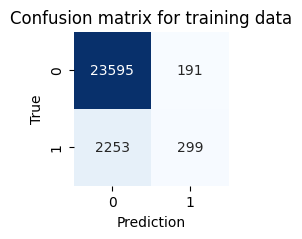

cm_train:
[[23595   191]
 [ 2253   299]]


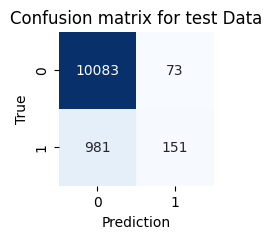

[[10083    73]
 [  981   151]]


In [ ]:
# Visualize training characteristic
con_mat_train = confusion_matrix(y_train, y_lrtrain_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(con_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix for training data')
plt.show()
print(f"cm_train:\n{con_mat_train}")

con_mat_test = confusion_matrix(y_test, y_lrtest_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(con_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix for test Data')
plt.show()
print(con_mat_test)

Insights:
1. May and March month has the highest model co-efficient.
2. Accuracy of the model is 0.9066265060240963.
3. poutcome is the most important variables.
4. The model is predicting non-subscribers to a great extent however it fails to predict the subscribers as we could see class imbalance in the market variable.

**2. For Decision Tree Model**

In [ ]:
print(f"feature_importances_:\n\n{dtree_model.feature_importances_}")
print("")
print(pd.DataFrame(dtree_model.feature_importances_, columns = ["Importances"],
                   index = X_train.columns).sort_values('Importances',
                                                        ascending=False))

feature_importances_:

[0.21557705 0.08021255 0.         0.         0.00285516 0.01069581
 0.01129716 0.11998735 0.09718238 0.0874334  0.03031328 0.02592087
 0.02686075 0.00828326 0.0280698  0.         0.0034617  0.0005587
 0.002527   0.00171616 0.00845697 0.00062174 0.00364147 0.00739372
 0.         0.01743196 0.02357698 0.01797066 0.01580419 0.02041129
 0.0059656  0.00741099 0.01531693 0.01035097 0.00929049 0.01305634
 0.00890816 0.02413704 0.00593498 0.01553457 0.01583255]

                      Importances
age                      0.215577
euribor3m                0.119987
nr.employed              0.097182
education                0.087433
campaign                 0.080213
marital_married          0.030313
housing_yes              0.028070
loan_yes                 0.026861
marital_single           0.025921
job_technician           0.024137
day_of_week_thu          0.023577
job_blue-collar          0.020411
day_of_week_tue          0.017971
day_of_week_mon          0.017432
poutcome

In [ ]:
# # Evaluate the model chatacteristic
y_dttest_pred = dtree_model.predict(X_test)
y_dttrain_pred = dtree_model.predict(X_train)
print("Decision Tree Model:\n")
print("Classification report for training data set:")
print(classification_report(y_train, y_dttrain_pred))
print("Classification report for testing data set:")
print(classification_report(y_test, y_dttest_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_dttest_pred))

Decision Tree Model:

Classification report for training data set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23786
           1       1.00      0.99      0.99      2552

    accuracy                           1.00     26338
   macro avg       1.00      0.99      1.00     26338
weighted avg       1.00      1.00      1.00     26338

Classification report for testing data set:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10156
           1       0.25      0.29      0.27      1132

    accuracy                           0.84     11288
   macro avg       0.58      0.60      0.59     11288
weighted avg       0.85      0.84      0.85     11288


Accuracy Score:
0.8409815733522324


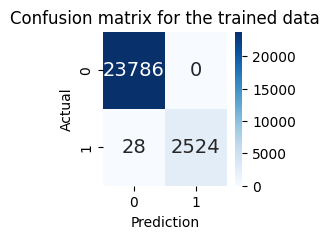

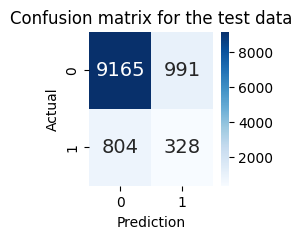

In [ ]:
# Confusion matrices
conf_mat_train = confusion_matrix(y_train, y_dttrain_pred)
conf_mat_test = confusion_matrix(y_test, y_dttest_pred)

# Visualize on training data
plt.figure(figsize=(2, 2))
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion matrix for the trained data")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# Visualize on testing data
plt.figure(figsize=(2, 2))
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion matrix for the test data")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

Insights:
1. Accuracy score of the model is 0.8409815733522324.
2. Age and euribor3m are tje important features for this model.
3. The model is predicting non-subscribers to a great extent however it fails to predict the subscribers as we could see class imbalance in the market variable.